<img src="../images/26-weeks-of-data-science-banner.jpg"/>

<h1 align="center">**Linear Regression** </h1>

# Program so far 
***

* Introduction to Python - You are now a buddying pythonista

* Introduction to Machine Learning - You can tell a classification task from a clustering 

* Basic Probability & Descriptive Stats - You are at peace with Statistics

* Steps involved in solving an end-to-end ML problem - One Step Closer to Machine Learning

# Agenda for the Day
***
* Understand the intuition behind Linear Regression
* Understand the Linear Regression Cost Function
* Understand the Linear Regression using Gradient Descent Algorithm
* Introduction to Linear Regression in sklearn
* Learn about the assumptions in Linear Regression Algorithm
* Evaluating Metrics for Regression

## What are we going to learn today ?
***

- **Dataset**
- **What is a predictor ?**
    - What is a predictor ? - (1/4)
    - What is a predictor ? - (2/4)
    - What is a predictor ? - (3/4)
    - What is a predictor ? - (4/4)
    - Predictors & Target for our Dataset
- **Plot our data**
    - Is there a relation ?
    - Plotting a line on a scatter plot
    - Which line to choose ?
- **Linear Regression**
    - Introducing Linear Regression
    - Dependent and Independent Variables
    - Univariate & Multivariate analysis
    - Cost Function
        - Cost Function - Why is it needed ?
        - Cost Function - Mathematical Representation
    - Gradient Descent
        - Gradient Descent - Intuition
        - Gradient Descent - Algorithm
    - Linear Regression in **`sklearn`**
    - Multivariate Linear Regression
    - Measuring Goodness Of Fit
    - Assumptions in Linear Regression
    - Evaluation Metrics for Linear Regression
        - Evaluation Metrics for Linear Regression - (1/3)
        - Evaluation Metrics for Linear Regression - (2/3)
        - Evaluation Metrics for Linear Regression - (3/3)
        - Mean Absolute Error
        - Root Mean Squared Error
        - $R^{2}$ - Intution
      
- **Industry Applications of Linear Regression**




In [2]:
# Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from __future__ import division
%matplotlib inline
from __future__ import print_function

In [3]:
from sklearn.linear_model import LinearRegression

## Dataset
***

Let's start by loading the dataset. We'll be using two `.csv` files. One having only one predictor and the other having multiple predictors. Since the target variable(we'll find out what target variables and predictors are below) is **quantitative/continuous**, this is the best for regression problems. 

Let's start loading the data for univariate analysis.

In [4]:
data = pd.read_csv('../data/house_prices.csv')
data.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In order to learn to make predictions, it is important to learn what a Predictor is.

## So what is a predictor? (1/4)
***

How could you say if a person went to tier 1, 2 or 3 college in America?
 
Simple, if someone is determined to pursue a Bachelor's degree, Higher SAT scores (or GPA) leads to more college admissions! 

### The graph below depicts Cornell's acceptance rate by SAT scores and many Universities show similar trends
***


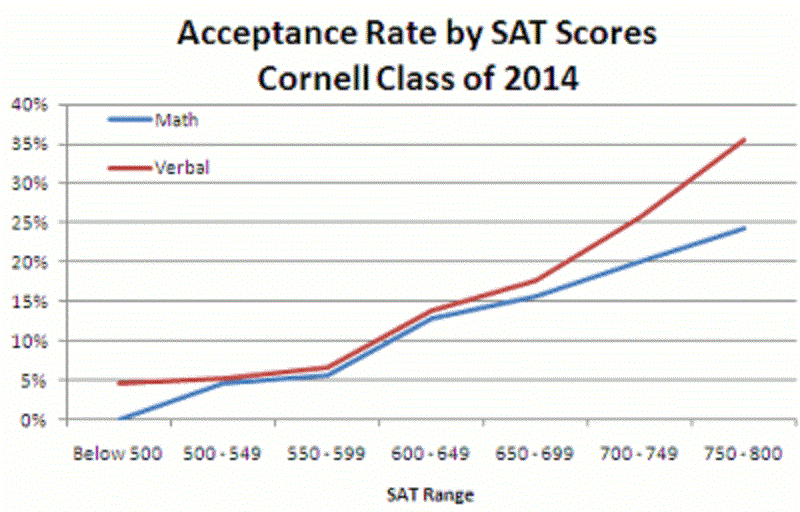  
<br/><br/>
Image Source : http://www.metaezra.com/archive/2010/08/cornell_acceptance_rates_by_sa.shtml

## What is a predictor? (2/4)
***

We also know that if we keep on drinking more and more beers, our Blood-Alcohol Content(BAC) rises with it. 

The graph below depicts just that !

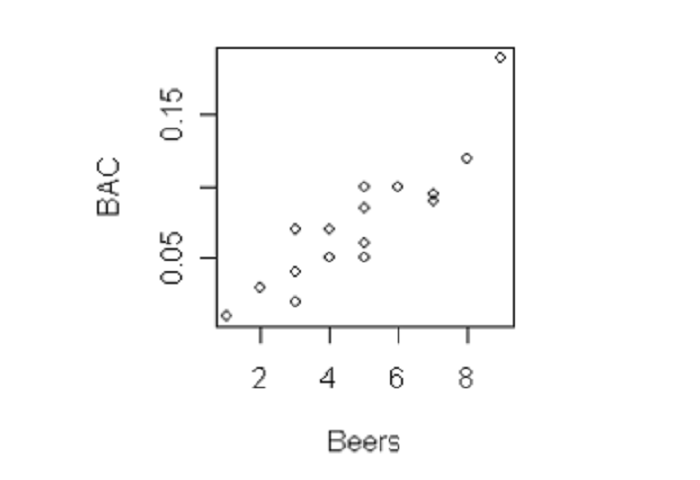

## What is a predictor? (3/4)
***

Think about the relationship between the Circumference of a Cirle and it's diameter. What happens to the former whilst the latter increases? 

## What is a predictor? (4/4)
***

The moral of the story is there are factors that influence the outcome of the variable of our interest. 

* SAT score --> University acceptance rate
* Number of beers --> Body alcohol level
* Diameter --> Circumference

These factors are known as **predictors** and the variable of interest is known as the **target variable**.

## Predictors & Target Variable for our dataset
*** 

Here, our target variable would be as mentioned above  ____________

** What could be the predictors for our target variable? **

Let's go with the **LotArea**

We would want to see if the price of a house is really affected by the area of the house

Intuitively, we all know the outcome but let's try to understand why we're doing this

## Plotting our data
***

 - Getting some motivation from **Week-5 Plot With Pandas notebook**, what's intriguing is how this data will look when we plot it 
 - Starting simple, let's just check how our data looks like in a scatter plot where: 
   - Area is taken along the X-axis
   - Price is taken along the Y-axis

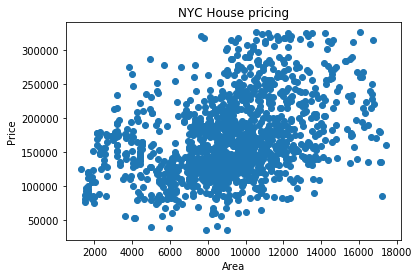

In [5]:
import matplotlib.pyplot as plt
plt.scatter(data['LotArea'], data['SalePrice'])
plt.title('NYC House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

## Is there a relation ?
*** 

  - By seeing our plot above, we can see an upward trend in the House Prices as the Area of the house increases
  - We can say that as the Area of a house increases, it's price increases too.
<br/>  

Now, let's say we want to predict the price of the house whose area is 14000 sq feet, how should we go about it?

## Fitting a Line On the Scatter Plot
***

 - Intuitively, we can just draw a straight line that would "capture" the trend of area and house price, and predict house price from that line.

<div class="alert alert-block alert-success">**Let's try and fit a line through all these points!**</div>

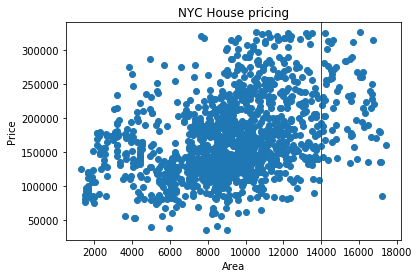

In [6]:
plt.scatter(data['LotArea'], data['SalePrice'])
plt.axvline(x=14000,linewidth='1',color='r')
plt.title('NYC House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

## Which line to choose?
***

As you saw, there are many lines which would seem to be fitting reasonably well.


consider following lines,


$$ price = 30000 + 15∗area\\
price=10000 + 17 ∗ area\\
price= 50000 + 12 ∗ area
$$

<div class="alert alert-block alert-success">**Let's try and plot them and see if they are a good fit**</div>

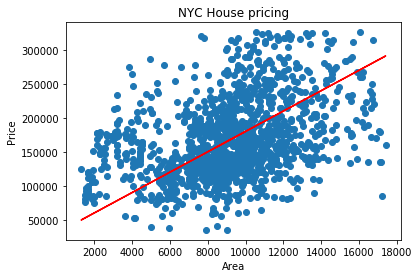

In [7]:
import matplotlib.pyplot as plt
plt.scatter(data.LotArea, data.SalePrice)
plt.plot(data.LotArea, 30000 + 15*data.LotArea, "r-")
plt.title('NYC House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

## One for you...
***

Refer the code above for help if needed and plot a line fitting our **'Sales Price'** data for
<br/><br/>
$$ price=10000 + 17 ∗ area $$

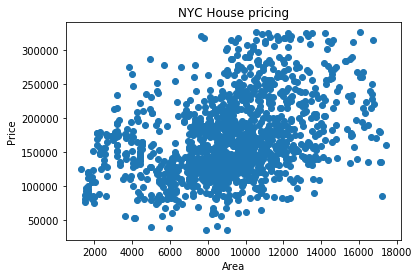

In [8]:
# plot "price=10000 + 17 ∗ area" line

plt.scatter(data.LotArea, data.SalePrice)

# your code here


plt.title('NYC House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

## Two for you...
***
Plot a line fitting our 'Sales Price' data for 
<br/>
$$ price= 50000 + 12 ∗ area $$

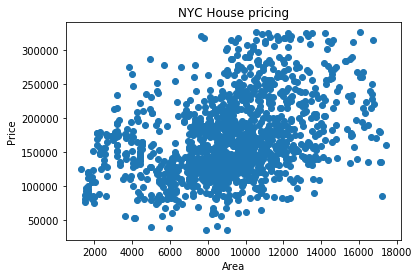

In [9]:
# plot "price= 50000 + 12 ∗ area" line

plt.scatter(data.LotArea, data.SalePrice)

# Your code here


plt.title('NYC House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

## Which line to choose?
***
Seems like all of them are a good fit for the data. Let's plot all of them in a single plot and see how that pans out.

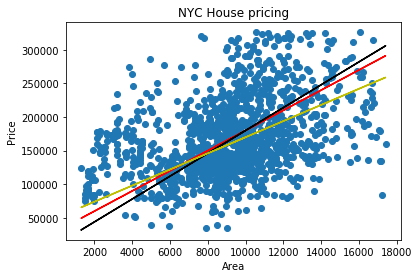

In [10]:
import matplotlib.pyplot as plt
plt.scatter(data.LotArea, data.SalePrice)
plt.plot(data.LotArea, 30000 + 15*data.LotArea, "r-")
plt.plot(data.LotArea, 10000 + 17*data.LotArea, "k-")
plt.plot(data.LotArea, 50000 + 12*data.LotArea, "y-")
plt.title('NYC House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

## Which line to choose?
***
As you can see although all three seemed like a good fit, they are quite different from each other. And in the end, they will result in very different predictions.

For example, for house area = 9600, the predictions for red, black and yellow lines are

In [11]:
# red line: 
print("red line:", 30000 + 15*9600) # <-- Inserted value 9600 inplace of LotArea 

# black line: 
print('black line:', 10000 + 17*9600) # <-- Inserted value 9600 inplace of LotArea

# yellow line:
print('yellow line:', 50000 + 12*9600) # <-- Inserted value 9600 inplace of LotArea


red line: 174000
black line: 173200
yellow line: 165200


<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br/>

## Which line to choose?
***

As you can see the price predictions are varying from each other significantly. So how do we choose the best line?

Well, we can define a function that measures how near or far the prediction is from the actual value.

If we consider the actual and predicted values as points in space, we can just calculate the distance between these two points!

This function is defined as:

$$(Y_{pred}-Y_{actual})^2$$

The farther the points, more the the distance and more is the value of the function !


It is known as the **cost function** and since this function captures square of distance, it is known as the **least-squares cost function**. 


The idea is to **minimize** the cost function to get the best fitting line.

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br/>

## Introducing *Linear Regression* :
***

Linear regression using least squared cost function is known as **Ordinary Least Squared Linear Regression**. 

This allows us to analyze the relationship between two quantitative variables and derive some meaningful insights

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br/>

## Dependent & Independent variable
***

Great! now before moving forward, let's learn some terminologies.
 
 - Here, we're trying to Predict the Price of the House using the value of it's Area 
 - Thus, Area is the **Independent Variable** 
 - Price is the **Dependent Variable**, since the value of price is **dependent** on the value of area
 

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br/>

## Univariate & Multivariate analysis 
***

- Since we're using **only 1** predictor (Area) to predict the Price, this method is also called **Univariate Regression**
- But more often than not, in real problems, we utilize 2 or more predictors. Such a regression is called **Muiltivariate Regression**. More on this later! 

## Notations !
***

We will start to use following notations as it helps us represent the problem in a concise way.

* $x^{(i)}$  denotes the predictor(s) - in our case it's the Area
* $y^{(i)}$  denotes the target variable (Price)

A pair ($x^{(i)}$ ,  $y^{(i)}$) is called a training example.

Let's consider that any given dataset contains **"m"** training examples or Observations

{ $x^{(i)}$  , $y^{(i)}$ ; i = 1, . . . , m} — is called a **training set**.

In this example, m = 1326 (Nos. of row)


For example, 2nd training example, ( x(2)  ,  y(2) ) corresponds to  **(9600,181500)**




<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br/>

## Cost Function - Why is it needed ?:
***

- An ideal case would be when all the individual points in the scatter plot fall directly on the line OR a straight line passes through all the points in our plot, but in reality, **that rarely happens**
  
- We can see that for a Particular Area, there is a difference between Price given by our data point (which is the correct observation) and the line (predicted observation or **Fitted Value**)

- So how can we Mathematically capture such differences and represent it? 

<img src="../images/icon/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>
<br/>

## Cost Function - Mathemtical Representation
***
We choose  θs so that predicted values are as close to the actual values as possible

We can define a mathematical function to capture the difference between the predicted and actual values.

This function is known as the cost function and denoted by $J(θ)$



$$J(θ) = \frac{1}{2m} \sum _{i=1}^m (h_\theta(X^{(i)})-Y^{(i)})^2$$

* $\theta$ is the coefficient of 'x' for our linear model intuitively. It measures how much of a unit change of 'x' will have an effect on 'y'
- Here, we need to figure out the values of intercept and coefficients so that  the cost function is minimized.
- We do this by a very important and widely used Algorithm: **Gradient Descent**

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br/>

## Gradient Descent Intuition
***
 - So, we want to choose θ so as to minimize J(θ)
 - Gradient Descent is an iterative method that starts with some “initial random value” for θ, and that repeatedly changes θ to make J(θ) smaller, until hopefully it converges to a value of θ that minimizes J(θ)
 

 


 - It repeatedly performs an update on θ as shown: 
 
      $$ \theta_{j} := \theta_{j}-\alpha \frac{\partial }{\partial \theta_{j}}J(\theta) $$
<br/>
 - Here α is called the learning rate. This is a very natural algorithm that repeatedly takes a step in the direction of steepest decrease of J(θ)     
    


<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br/>

## Gradient Descent Algorithm
***
To get the optimal value of  θ , perform following algorithm known as the **Batch Gradient Descent Algorithm**

   - Assume initial θ
   - Calculate h(θ) for i=1 to m
   - Calculate J(θ). Stop when value of J(θ) assumes global/local minima
   - Calculate $\thinspace\sum_{i=1}^{m}(y^{(i)}-h_{\theta}(x^{(i)}))*x_{j}$   for all $\theta_{j}'s$
   - Calculate new $\thinspace\theta_{j}'s$
   - Go to step 2

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br/>

## Linear Regression in `sklearn`
***

**`sklearn`** provides an easy api to fit a linear regression and predict values using linear regression

Let's see how it works

In [12]:
X = data.LotArea[:,np.newaxis]  # Reshape
y = data.SalePrice

In [13]:
  # Fitting Simple Linear Regression to the Training set


regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
# Predicting the Test set results
y_pred = regressor.predict(X)

## Plotting the Best Fitting Line

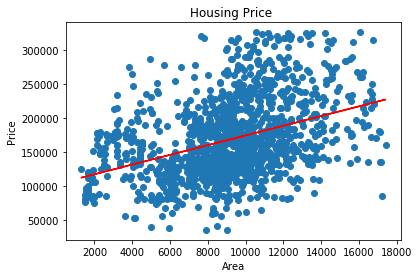

In [15]:
 # Train Part
plt.scatter(X, y)
plt.plot(X, y_pred, "r-")
plt.title('Housing Price ')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

## Prediction made Easy
***

 - Visually, now we now have a nice approximation of how Area affects the Price 
 - We can also make a prediction, the easy way of course! 
 - For example: If we want to buy a house of 14,000 sq. ft, we can simply draw a vertical line from 14,000 up to our Approximated Trend line and continue that line towards the y-axis


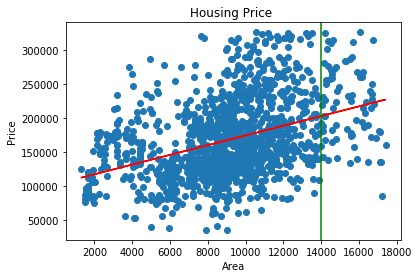

In [16]:
 # Train Part
plt.scatter(X, y)
plt.plot(X, y_pred, "r-")
plt.title('Housing Price ')
plt.xlabel('Area')
plt.ylabel('Price')
plt.axvline(x=14000,c='g');


 - We can see that for a house whose area ~ 14,000 we need to pay ~ 2,00,000-2,25,000

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br/>

## Multivariate Linear Regression
***
- In Univariate Linear Regression we used only two variable. One as Dependent Variable and Other as Independent variable.
- Now, we will use Multiple Dependent variables instead of one and will predict the Price i.e. Independent variable.
- i.e the equation for multivariate linear regression is modified as below:
    
    $$ y = \theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\cdots +\theta_{n}x_{n} $$


- So, along with Area we will consider other variables as such as Pool etc.

In [27]:
#Loading the data
NY_Housing = pd.read_csv("../data/house_prices_multivariate.csv")
NY_Housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,2008,250000


In [30]:
# making Independent and Dependent variables from the dataset
X = NY_Housing.iloc[:,:-1] # Selecting everything except the last column
y = NY_Housing.SalePrice   

In [31]:
# Fitting Multiple Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
print("intercept:", regressor.intercept_) # This is the y-intercept 
print("coefficients of predictors:", regressor.coef_) # These are the weights or regression coefficients.

intercept: 310649.2600888903
coefficients of predictors: [ 4.21581098e+01  4.41367617e-01  1.77089455e+04  5.84597164e+03
  3.59658315e+02  1.19385237e+02  2.59435150e+01  9.76748897e+00
  7.65860419e-01 -6.61329856e-01  9.87201953e+00  1.96567898e+01
  1.31846868e+01 -4.66155079e+00  2.81799257e+01  6.78157998e+03
  3.36169287e+02  1.40344800e+03 -2.93573021e+03 -8.64074712e+03
 -3.35073713e+04  6.10172168e+03  3.20869122e+03 -8.23684306e+01
  1.56189970e+04  9.59392447e+00  2.51559075e+01  5.60981357e-01
  1.07712460e+01  2.51081902e+01  5.36124522e+01 -4.13099007e+01
 -8.16461371e-02 -5.83097021e+02]


## Predicting the price
***
Now let's say I want to predict the price of a house with following specifications.

In [33]:
my_house = X.iloc[155]
my_house

LotFrontage          0.0
LotArea          16669.0
OverallQual          8.0
OverallCond          6.0
YearBuilt         1981.0
YearRemodAdd      1981.0
MasVnrArea         653.0
BsmtFinSF1           0.0
BsmtFinSF2           0.0
BsmtUnfSF         1686.0
TotalBsmtSF       1686.0
1stFlrSF          1707.0
2ndFlrSF             0.0
LowQualFinSF         0.0
GrLivArea         1707.0
BsmtFullBath         0.0
BsmtHalfBath         0.0
FullBath             2.0
HalfBath             1.0
BedroomAbvGr         2.0
KitchenAbvGr         1.0
TotRmsAbvGrd         6.0
Fireplaces           1.0
GarageYrBlt       1981.0
GarageCars           2.0
GarageArea         511.0
WoodDeckSF         574.0
OpenPorchSF         64.0
EnclosedPorch        0.0
3SsnPorch            0.0
ScreenPorch          0.0
PoolArea             0.0
MiscVal              0.0
YrSold            2006.0
Name: 155, dtype: float64

In [34]:
pred_my_house = regressor.predict(my_house.values.reshape(1, -1))
print("predicted value:", pred_my_house[0])

predicted value: 264519.41857028333


In [35]:
print("actual value:", y[155])

actual value: 228000


As you can see the predicted value is not very far away from the actual value.

Now let's try to predict the price for all the houses in the dataset.

In [24]:
# Predicting the results
y_pred = regressor.predict(X)
y_pred[:10]

array([223165.2446233 , 193708.14702761, 216394.79759077, 197356.62505514,
       295125.75398645, 172516.96207704, 269477.13355183, 245198.81455232,
       168787.92247659,  87185.78920276])

<div class="alert alert-block alert-success">Great! now, let's put the predicted values next to the actual values and see how good a job have we done!</div>

In [25]:
prices = pd.DataFrame({"actual": y,
          "predicted": y_pred})
prices.head(10)

,actual,predicted
0,208500,223165.244623
1,181500,193708.147028
2,223500,216394.797591
3,140000,197356.625055
4,250000,295125.753986
5,143000,172516.962077
6,307000,269477.133552
7,200000,245198.814552
8,129900,168787.922477
9,118000,87185.789203


## Measuring the goodness of fit
***
Must say we have done a reasonably good job of predicting the house prices.

However, as the number of predictions increase it would be difficult to manually check the goodness of fit. In such a case, we can use the cost function to check the goodness of fit.

<div class="alert alert-block alert-success">Let's first start by finding the mean squared error (MSE)</div>


In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y)

1219044781.494744

<div class="alert alert-block alert-warning">**What do you think about the error value?**</div>

As you would notice the error value seems very high (in billions!). Why has it happened?

MSE is a relative measure of goodness of fit. We say that because the measure of goodness of MSE depends on the unit. 
As it turns out, Linear regression depends on certain underlying assumptions. Violation of these assumptions outputs poor results.

Hence, it would be a good idea to understand these assumptions.

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br/>

## Assumptions in Linear Regression
***

There are some key assumptions that are made whilst dealing with Linear Regression

These are pretty intuitive and very essential to understand as they play an important role in finding out some relationships in our dataset too! 

Let's discuss these assumptions, their importance and mainly **how we validate these assumptions**! 

### Assumption - 1
***
1) **Linear Relationship Assumption: **

Relationship between response (Dependent Variables) and feature variables (Independent Variables) should be linear.

 - **Why it is important:**

<div class="alert alert-block alert-info">Linear regression only captures the linear relationship, as it's trying to fit a linear model to the data.</div>



 - **How do we validate it:**

<div class="alert alert-block alert-success">The linearity assumption can be tested using scatter plots.</div>



***
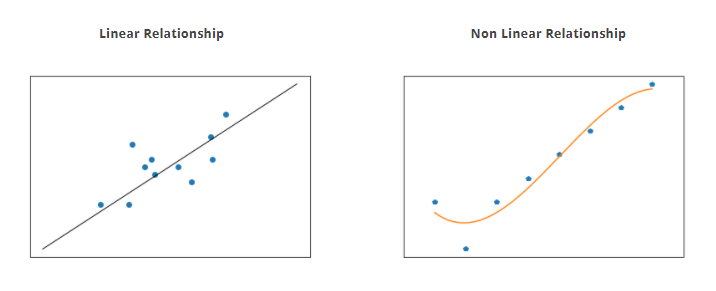

### Assumption - 2
***
2) **Little or No Multicollinearity Assumption:**

It is assumed that there is little or no multicollinearity in the data.

 - **Why it is important:**

<div class="alert alert-block alert-info">It results in unstable parameter estimates which makes it very difficult to assess the effect of independent variables.</div>


 - **How to validate it:**

Multicollinearity occurs when the features (or independent variables) are not independent from each other. <div class="alert alert-block alert-success">Pair plots of features help validate.</div>



### Assumption - 3
***
3) **Homoscedasticity Assumption: **

Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables. 

 - **Why it is important:**

<div class="alert alert-block alert-info">Generally, non-constant variance arises in presence of outliers or extreme leverage values.</div>


 - **How to validate:**

<div class="alert alert-block alert-success">Plot between  dependent variable vs error
.</div>


***
In an ideal plot the variance around the regression line is the same for all values of the predictor variable.
In this plot we can see that the variance around our regression line is nearly the same and hence it satisfies the condition of homoscedasticity.
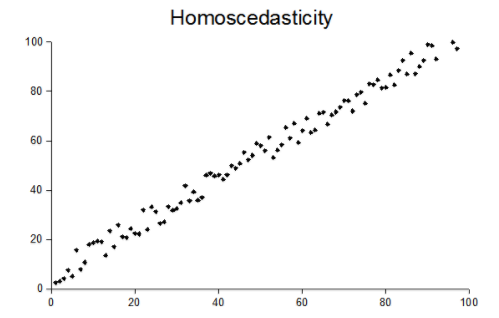
<br/><br/>
Image Source : https://en.wikipedia.org/wiki/Homoscedasticity

### Assumption - 4
***

4) **Little or No autocorrelation in residuals:**

There should be little or no autocorrelation in the data. 

Autocorrelation occurs when the residual errors are not independent from each other.

- **Why it is important:**

<div class="alert alert-block alert-info">The presence of correlation in error terms drastically reduces model's accuracy. 

This usually occurs in time series models. If the error terms are correlated, the estimated standard errors tend to underestimate the true standard error.</div>


 - **How to validate:**
<div class="alert alert-block alert-success">Residual vs time plot. look for the seasonal or correlated pattern in residual values.</div>



***
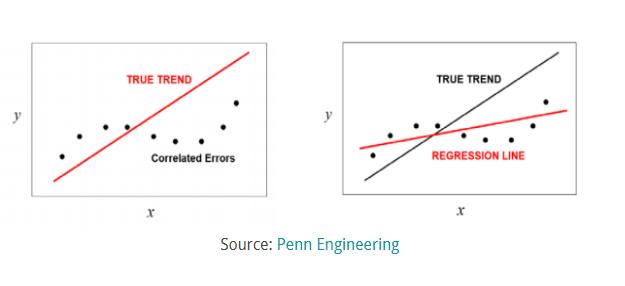

### Assumption - 5
***

5) **Normal Distribution of error terms**

 - **Why it is important:**
 
<div class="alert alert-block alert-info">Due to the Central Limit Theorem, we may assume that there are lots of underlying facts affecting the process and the sum of these individual errors will tend to behave like in a zero mean normal distribution. In practice, it seems to be so.
</div>

 - **How to validate:**
<div class="alert alert-block alert-success">You can look at QQ plot
</div>


***
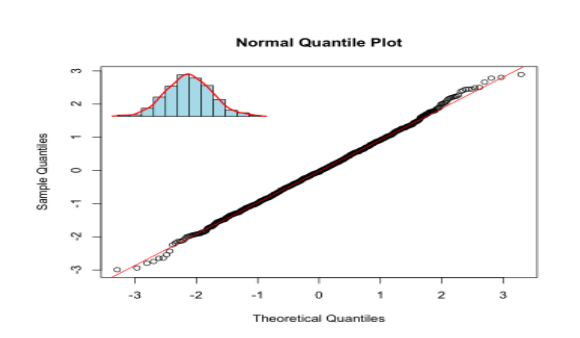

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br/>

## Evaluation Metrics for Regression (1/3)
***
- In Regression (and in other Machine Learning techniques) it's essential to know how good our model has performed. 

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br/>

## Evaluation Metrics for Regression (2/3)
***
- **Why? Doesn't the computer do it Automatically?** 

    - At first, it's easier to think that the Computer should automatically get the best model once we tell it what to do
    
    - This is not the case! We tell the computer what features/variables to use and what methods to use to fit the data
    
    - As models get more and more complicated (we'll get into this later) - we need to input "hyper-parameters" that essentially tell the computers how much of that quantity or what value we should use while **optimizing complicated parameters** and **cost functions**
    

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br/>

## Evaluation Metrics for Regression (3/3)
***
    - Thus, evaluating our model will help us know how well we're doing with our current selection of Features from the data, hyperparameters, etc. 
    
- There are three basic evaluation metrics for regression to check the goodness of fit.

    - Mean Absolute Error
    - Root Mean square Error
    - R-Square (Residual value)

<img src="../images/icon/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>
<br/>

### Mean Absolute Error
***
- The mean absolute error (MAE) is a quantity used to measure how close forecasts or predictions are to the actual vales. The mean absolute error is given by:
$$MAE= \frac{1} {N}{\sum_{i=1}^N |y_{i} - \hat{y}_{i}|}$$
 - We take the Absolute value of the difference because our Predicted Values can be greater than or less than actual values(resulting in a negative difference) 
 - If we don't take the Modulus then the result of all the differences would be a 0. Figuring out why is a good exercise! 

<img src="../images/icon/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>
<br/>
### Root Mean Square Error
*** 
 - The square root of the mean/average of the square of all of the error.
 - RMSE is very commonly used and makes for an excellent general purpose error metric for numerical predictions.
 - Compared to the similar Mean Absolute Error, RMSE amplifies and severely punishes large errors.
 
 $$RMSE = {\sqrt {\frac{1} {N}{\sum\limits_{i = 1}^N {(y_{i} - \hat{y}_{i} } })^{2} } }$$



 - **Why are we squaring the Residuals and then taking a root?**
     - Residuals are basically the difference between Actual Values & Predicted Values
     - Residuals can be positive or negative as the predicted value can underestimate or overestimate the actual value
     - Thus to just focus on the magnitude of the error we take the square of the difference as it's always positive
     
   
 - **So what is the advantage of RMS when we could just take the absolute difference instead of squaring**
     - Squaring **penalises i.e. severely punishes large differences** in prediction. This is the reason why RMSE is powerful as compared to Absolute Error.
     - Evaluating the RMSE and tuning our model to minimize it results in a more robust model


### Interpretation of $R^2$
***
- This is very important to understand, so read the following line multiple times if needed
 - R - Square is a  **measure of the proportion of variability in the response that is explained by the regression model.**
 
 - Earlier, when the Blood Alcohol Content Data is fitted a Linear Model, the R-Square = 0.952
    - This means that 95.2% of the the Variability in the data given to us is explained by our Linear Model, which is good! 
    
  - **R - Square values are always in the range of [0,1]**

<img src="../images/icon/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>
<br/>
## $R^2$ Intuition 
***
### Sum of Squares Decomposition and $R^2$:
 - Before we get into calculating R^2, let's understand, what the different Sum of Squares for our model are: 
   - In RMSE, we have already been introduced to Squared Residuals which is also called Error Sum of Squares (SSE) 
   $$SSE = {\sum\limits_{i = 1}^N {(y_{i} - \hat{y}_{i} } })^{2} $$

- Additionally, we have the Total Sum of Squares (SST) which is nothing but the Squared difference between the Actual Values (${y}_{i}$) and the Mean of our dataset ($\bar{y}$)   
   $$SST(Total) = {\sum\limits_{i = 1}^N {(y_{i} - \bar{y} } })^{2} $$

   - And we also have Regression Sum of Squares, which is the squared difference between the Predicted values ($\hat{y}_{i}$) and the Mean ($\bar{y}$)
      $$SS(Regression) = {\sum\limits_{i = 1}^N {(\hat{y}_{i} - \bar{y} } })^{2} $$

<img src="../images/icon/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>
## $R^2$ Intuition 
***
Now, intuitively, we can see that: 

     SST(Total) = SS(Regression) + SSE 
     
Thus $R^2$ is defined as: 
    $$ R^2 = \frac{SS(Regression)}{SST(Total)} = 1-\frac{SSE}{SST(Total)} $$



However, in many cases, R^2 is not really a good metric **since it either increases or stays constant and can never decrease** and so we use another metric known as **Adjusted R-Squared**

## Industry applications of Linear Regression
***
Some of the few applications of Linear Regression include:

- <b><u>Used in Predictive Analysis</u>:</b>&nbsp; Regression analysis can be used to predict the sales of products in the future by analysing the data of past buying behaviours of customers.
<br/><br/>
- <b><u>Used in Risk Analysis</u>:</b>&nbsp;Linear regression can be used to analyze risk. For example, a health insurance company might conduct a linear regression plotting number of claims per customer against age and discover that older customers tend to make more health insurance claims. The results of such an analysis might guide important business decisions made to account for risk.
<br/><br/>
- <b><u>Used in Astronomy</u>:</b>&nbsp; Linear Regression has it's applications in astronomical sciences too. Refer here: - http://adsabs.harvard.edu/abs/1990ApJ...364..104I
<br/><br/>
- <b><u>Use in Finance</u>:</b>&nbsp; Linear regression is widely used throughout Finance in a plethora of applications which include predicting the future price of stocks, commodities and other traded instruments using statistical techniques. It has also found it’s application in multiple proven trading systems used by hedge funds and large institutional investors.

In [13]:
# We have loaded the dataset for Mini Challenges below in the variable 'df' 
# Sales is the target variable and the rest are predictors 


import pandas as pd
import numpy as np
#Import data
df = pd.read_csv('../data/Advertising.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 1
***

Find the relationship between the predictor and target variables by plotting a scatter plot

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 2
***
Slice the predictors and target into variables X and y respectively 

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 3
***
Fit a linear regression model on the variable X

In [14]:
from sklearn.linear_model import LinearRegression

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 4
***
Find the intercept and coefficients for the model fitted above.

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 5
***
Predict on the variable X and create a DataFrame of the actual values and predicted values and find the mean squared error

<img src="../images/icon/Recap.png" alt="Recap" style="width: 100px;float:left; margin-right:15px"/>
<br/>
# In-session Recap Time
***
* Understand how to make a prediction using predictors and fitting of a line
* Understand the Linear Regression Cost Function
* Understand the Linear Regression using Gradient Descent Algorithm 
* Introduction to Linear Regression in sklearn
* Learn about the assumptions in Linear Regression Algorithm
* Evaluation Metric of your regression

# Thank You
***

### Next Session: - 
- Initial Exploration
- Introduction to Seaborn
- Univariate Analysis
- Multi-variate Analysis

For more queries - Reach out to academics@greyatom.com 